In [3]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

In [4]:

def spline(x, y):
    """
    Computes the second derivatives of the spline at the points x.

    Parameters:
    x (array-like): The x-coordinates of the data points.
    y (array-like): The y-coordinates of the data points.
    yp1 (float): First derivative at the first data point.
    ypn (float): First derivative at the last data point.

    Returns:
    y2 (numpy.ndarray): The second derivatives of the spline at each x.
    """
    n = len(x)
    y2 = np.zeros(n)
    u = np.zeros(n)

    # Boundary conditions
    y2[n-1] = 0
    y2[1] = 0

    # Main loop
    for i in range(1, n - 1):
        sig = (x[i] - x[i - 1]) / (x[i + 1] - x[i - 1])
        p = sig * y2[i - 1] + 2.0
        y2[i] = (sig - 1.0) / p
        u[i] = (6.0 * ((y[i + 1] - y[i]) / (x[i + 1] - x[i]) - (y[i] - y[i - 1]) / (x[i] - x[i - 1])) / (x[i + 1] - x[i - 1]) - sig * u[i - 1]) / p

    # End boundary conditions


    # Back substitution
    for k in range(n - 2, -1, -1):
        y2[k] = y2[k] * y2[k + 1] + u[k]

    return y2

def splint(xa, ya, y2a, x):
    """
    Evaluates the spline at the given x.

    Parameters:
    xa (array-like): The x-coordinates of the data points.
    ya (array-like): The y-coordinates of the data points.
    y2a (array-like): The second derivatives of the spline.
    x (float): The x-coordinate at which to evaluate the spline.

    Returns:
    y (float): The interpolated value of the spline at x.
    """
    n = len(xa)
    klo = 0
    khi = n - 1

    # Binary search for the correct interval
    while (khi - klo) > 1:
        k = (khi + klo) // 2
        if xa[k] > x:
            khi = k
        else:
            klo = k

    h = xa[khi] - xa[klo]
    if h == 0.0:
        raise ValueError('Bad xa input in splint')

    a = (xa[khi] - x) / h
    b = (x - xa[klo]) / h
    y = (a * ya[klo] + b * ya[khi] +
         ((a**3 - a) * y2a[klo] + (b**3 - b) * y2a[khi]) * (h**2) / 6.0)
    
    return y


In [7]:
import scipy.special as sp
e = 1e-30
def function(x):
    val = x**(1+sp.j0(x))/np.sqrt((1+100*x**2)*(1-x)+e)
    return val

 Function table and plot

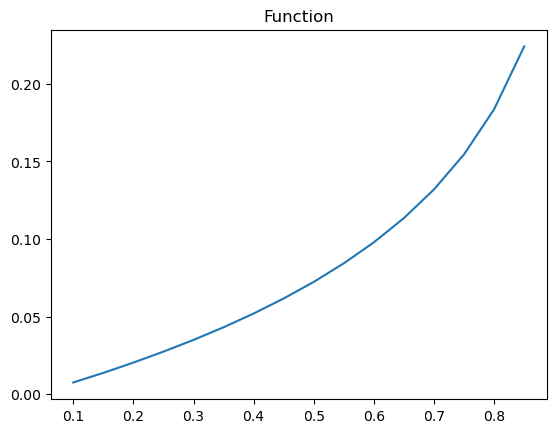

In [8]:
x = np.arange(0.1,0.9,0.05) 
y = function(x)
y1 = sp.j0(x)
plt.plot(x,y)
plt.title("Function")
plt.show()

Natural spline interpolation

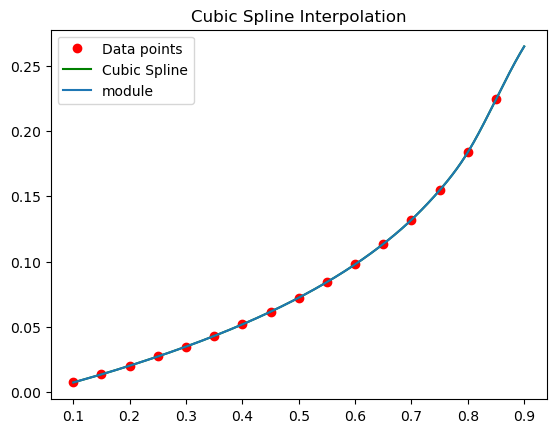

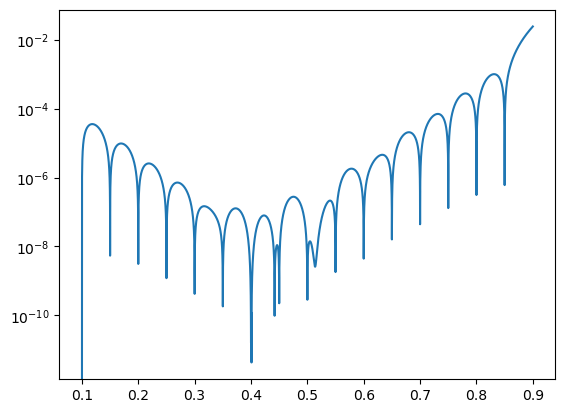

In [43]:
y2 = spline(x, y)

# Evaluate the spline at new points
xx = np.linspace(0.1,0.9, 10000)
yy = np.array([splint(x, y, y2, xi) for xi in xx])
tyy = function(xx)
cs = CubicSpline(x, y, bc_type='natural')
yy2 = cs(xx)

err = np.abs(yy-tyy)
err1 = np.abs(yy2-tyy)

# Plot the results
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'g', label='Cubic Spline')
plt.plot(xx,yy2,label ="module")
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()
plt.semilogy(xx,err)

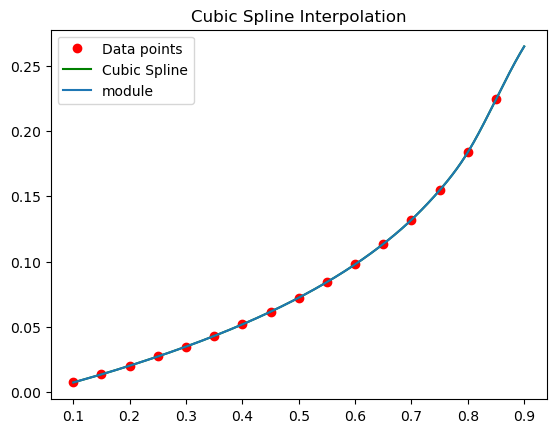

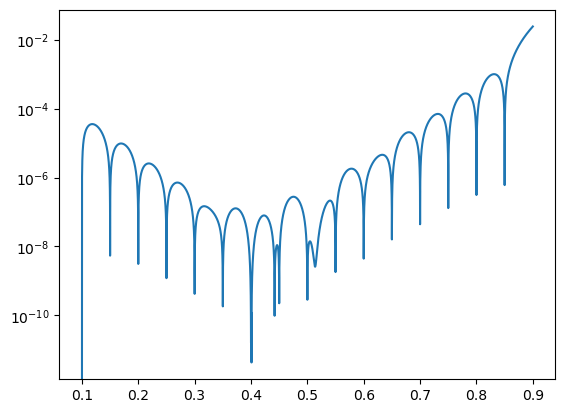

In [9]:
x = np.arange(0.1,0.9,0.05) 
y = function(x)
y2 = spline(x, y)

# Evaluate the spline at new points
xx = np.linspace(0.1,0.9, 10000)
yy = np.array([splint(x, y, y2, xi) for xi in xx])
tyy = function(xx)
cs = CubicSpline(x, y, bc_type='natural')
yy2 = cs(xx)

err = np.abs(yy-tyy)
err1 = np.abs(yy2-tyy)

# Plot the results
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'g', label='Cubic Spline')
plt.plot(xx,yy2,label ="module")
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()
plt.semilogy(xx,err1)

Error vs number of points (Natural boundary condition)

100 7.677656412641287e-05
200 1.9098105706605306e-05
300 8.464946010811047e-06
400 4.748363357232055e-06
500 3.0362808689510246e-06
600 2.1062090171941605e-06
700 1.54242878325217e-06
800 1.1844053217080486e-06
900 9.351955912451082e-07


Text(0.5, 1.0, 'Error vs no of points')

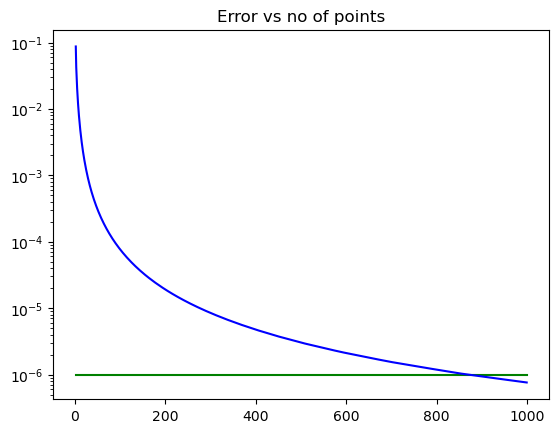

In [10]:
ra = range(2,1000)
error = []
error1 = []
for i in ra:
    x = np.linspace(0.1,0.9,i) 
    y = function(x)



    # Compute the second derivatives
    #y2 = spline(x, y)

    # Evaluate the spline at new points
    xx = np.linspace(0.1,0.9,10000)
    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    #err = np.abs(yy-tyy)
    #error.append(np.max(err))
    cs = CubicSpline(x, y, bc_type='natural')
    yy2 = cs(xx)
    err1 = np.abs(yy2-tyy)
    error1.append(np.max(err1))
    if i%100 == 0 :
        print(i,np.max(err1))
hor = [10**-6 for i in ra]

plt.semilogy(ra,hor,"g",ra,error1,"b")
plt.title('Error vs no of points')

In [31]:
def spline(x, y, regularization=1e-10):
    """
    Computes the second derivatives of the spline at the points x using the not-a-knot condition,
    with a regularization option to prevent singular matrices.

    Parameters:
    x (array-like): The x-coordinates of the data points.
    y (array-like): The y-coordinates of the data points.
    regularization (float): A small value added to the diagonal to avoid singular matrices.

    Returns:
    y2 (numpy.ndarray): The second derivatives of the spline at each x.
    """
    # Ensure x values are unique
    if len(np.unique(x)) != len(x):
        raise ValueError("The x values must be unique and spaced apart.")

    n = len(x)
    if n < 3:
        raise ValueError("There must be at least three data points to use the not-a-knot condition.")

    y2 = np.zeros(n)

    # Differences between x points and slopes between y points
    h = np.diff(x)
    delta = np.diff(y) / h

    A = np.zeros((n, n))
    B = np.zeros(n)

    # Not-a-knot condition at the first point
    A[0, 0] = h[1]
    A[0, 1] = -(h[0] + h[1])
    A[0, 2] = h[0]

    # Not-a-knot condition at the last point
    A[-1, -3] = h[-2]
    A[-1, -2] = -(h[-2] + h[-1])
    A[-1, -1] = h[-1]

    # Fill the inner points using the natural spline conditions
    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        B[i] = 6 * (delta[i] - delta[i - 1])

    # Regularization to prevent singular matrix errors
    A += np.eye(n) * regularization

    # Solve for the second derivatives
    y2 = np.linalg.solve(A, B)
    
    return y2


def splint(xa, ya, y2a, x):
    """
    Evaluates the spline at the given x.

    Parameters:
    xa (array-like): The x-coordinates of the data points.
    ya (array-like): The y-coordinates of the data points.
    y2a (array-like): The second derivatives of the spline.
    x (float): The x-coordinate at which to evaluate the spline.

    Returns:
    y (float): The interpolated value of the spline at x.
    """
    n = len(xa)
    klo = 0
    khi = n - 1

    # Binary search for the correct interval
    while (khi - klo) > 1:
        k = (khi + klo) // 2
        if xa[k] > x:
            khi = k
        else:
            klo = k

    h = xa[khi] - xa[klo]
    if h == 0.0:
        raise ValueError('Bad xa input in splint')

    a = (xa[khi] - x) / h
    b = (x - xa[klo]) / h
    y = (a * ya[klo] + b * ya[khi] +
         ((a**3 - a) * y2a[klo] + (b**3 - b) * y2a[khi]) * (h**2) / 6.0)
    
    return y




Not a Knot boundary condition

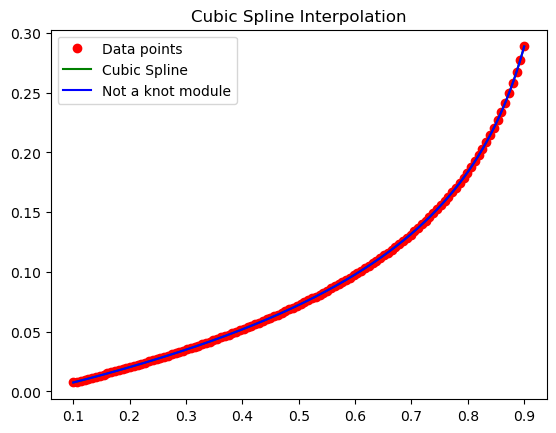

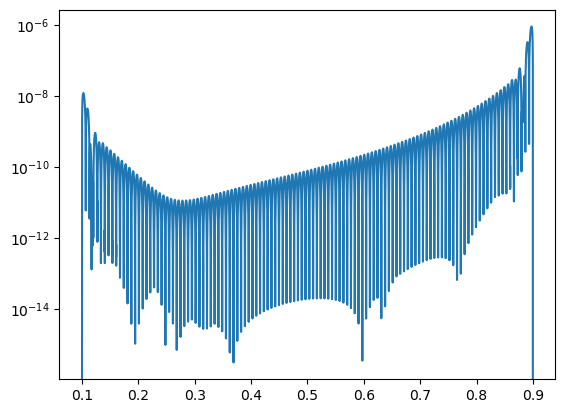

In [38]:
x = np.linspace(0.1,0.9,120) 
y = function(x)

# Compute the second derivatives
y2 = spline(x, y)

# Evaluate the spline at new points
xx = np.linspace(0.1,0.9, 10000)
yy = np.array([splint(x, y, y2, xi) for xi in xx])
tyy = function(xx)
cs = CubicSpline(x, y, bc_type='not-a-knot')
yy2 = cs(xx)
err = np.abs(yy-tyy)
err1= np.abs(yy2-tyy)

# Plot the results
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'g', label='Cubic Spline')
plt.plot(xx, yy2, 'b', label="Not a knot module" )
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()
plt.semilogy(xx,err1)

Error vs no of points (Not a knot boundary condition)

100 1.7491765703092632e-06
200 1.2759811657270248e-07
300 2.657872527622729e-08
400 8.638447401843052e-09
500 3.5960936450862846e-09
600 1.7531276985671695e-09
700 9.536683664990164e-10
800 5.622928234139124e-10
900 3.526348657523215e-10


Text(0.5, 1.0, 'Error vs no of points')

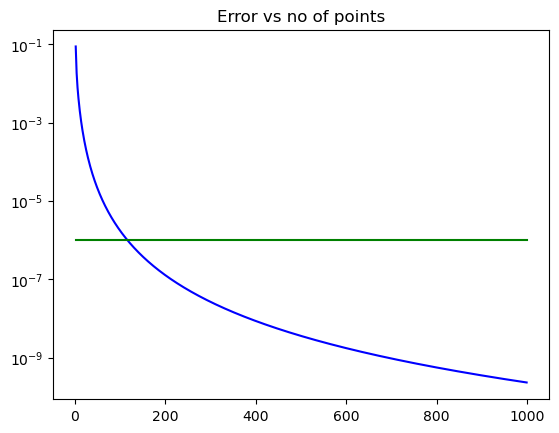

In [13]:
a = range(3,1000)
error = []
error1 = []
for i in ra:
    x = np.linspace(0.1,0.9,i,endpoint=True) 
    y = function(x)


    # Compute the second derivatives
    #y2 = spline(x, y)
    # Evaluate the spline at new points
    xx = np.linspace(0.1,0.9, 10*i,endpoint=True)
    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    cs = CubicSpline(x, y, bc_type='not-a-knot')
    yy2 = cs(xx)
    #err = np.abs(yy-tyy)
    err1 = np.abs(tyy-yy2)
    #error.append(np.max(err))
    error1.append(np.max(err1))
    if i%100 == 0 :
        print(i,np.max(err1))
hor = [10**-6 for i in ra]
error1not = error1

plt.semilogy(ra,error1,"b",ra,hor,"g")#,ra,error,"r")
plt.title('Error vs no of points')

In [14]:
def p(x):
    return 1-x+100*x**2-100*x**3
def funcder(x):
    val  = ((1+sp.j0(x))/x-sp.j1(x)*np.log(x)-1/2*(-1+200*x-300*x**2)/(p(x)+e))*function(x)
    return val

First derivative boundary condition

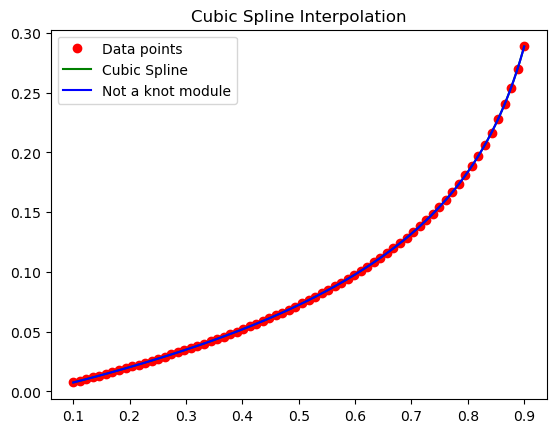

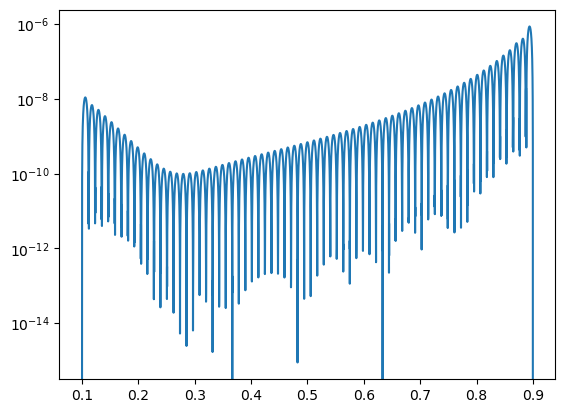

In [40]:
def spline(x, y, yp1, ypn):
    """
    Computes the second derivatives of the spline at the points x.

    Parameters:
    x (array-like): The x-coordinates of the data points.
    y (array-like): The y-coordinates of the data points.
    yp1 (float): First derivative at the first data point.
    ypn (float): First derivative at the last data point.

    Returns:
    y2 (numpy.ndarray): The second derivatives of the spline at each x.
    """
    n = len(x)
    y2 = np.zeros(n)
    u = np.zeros(n)

    # Boundary conditions
    if yp1 > 0.99e30:
        y2[0] = 0.0
    else:
        y2[0] = (3.0 / (x[1] - x[0])) * ((y[1] - y[0]) / (x[1] - x[0]) - yp1)

    # Main loop
    for i in range(1, n - 1):
        sig = (x[i] - x[i - 1]) / (x[i + 1] - x[i - 1])
        p = sig * y2[i - 1] + 2.0
        y2[i] = (sig - 1.0) / p
        u[i] = (6.0 * ((y[i + 1] - y[i]) / (x[i + 1] - x[i]) - (y[i] - y[i - 1]) / (x[i] - x[i - 1])) / (x[i + 1] - x[i - 1]) - sig * u[i - 1]) / p

    # End boundary conditions
    if ypn > 0.99e30:
        y2[n-1] = 0.0
    else:
        y2[n-1] = (3.0 / (x[n - 1] - x[n - 2])) * (ypn - (y[n - 1] - y[n - 2]) / (x[n - 1] - x[n - 2]))

  

    # Back substitution
    for k in range(n - 2, -1, -1):
        y2[k] = y2[k] * y2[k + 1] + u[k]

    return y2

def splint(xa, ya, y2a, x):
    """
    Evaluates the spline at the given x.

    Parameters:
    xa (array-like): The x-coordinates of the data points.
    ya (array-like): The y-coordinates of the data points.
    y2a (array-like): The second derivatives of the spline.
    x (float): The x-coordinate at which to evaluate the spline.

    Returns:
    y (float): The interpolated value of the spline at x.
    """
    n = len(xa)
    klo = 0
    khi = n - 1

    # Binary search for the correct interval
    while (khi - klo) > 1:
        k = (khi + klo) // 2
        if xa[k] > x:
            khi = k
        else:
            klo = k

    h = xa[khi] - xa[klo]
    if h == 0.0:
        raise ValueError('Bad xa input in splint')

    a = (xa[khi] - x) / h
    b = (x - xa[klo]) / h
    y = (a * ya[klo] + b * ya[khi] +
         ((a**3 - a) * y2a[klo] + (b**3 - b) * y2a[khi]) * (h**2) / 6.0)
    
    return y

x = np.linspace(0.1,0.9,70) 
y = function(x)

# Set boundary conditions: first and last derivatives (natural spline)
yp1 = funcder(x[0])  # Derivative at the start
ypn = funcder(x[-1]) # Derivative at the end


# Compute the second derivatives
y2 = spline(x, y,yp1,ypn)

# Evaluate the spline at new points
xx = np.linspace(0.1,0.9,10000)
yy = np.array([splint(x, y, y2, xi) for xi in xx])
tyy = function(xx)
cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
yy2 = cs(xx)
err = np.abs(yy-tyy)
err1= np.abs(yy2-tyy)

# Plot the results
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'g', label='Cubic Spline')
plt.plot(xx, yy2, 'b', label="Not a knot module" )
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()
plt.semilogy(xx,err1)

100 2.144354003807969e-07
200 1.3714580249235553e-08
300 2.724968084510948e-09
400 8.643872839719791e-10
500 3.5454550406655017e-10
600 1.7112944394881424e-10
700 9.242617782234674e-11
800 5.420180970716615e-11
900 3.3848979175132854e-11


Text(0.5, 1.0, 'Error vs no of points')

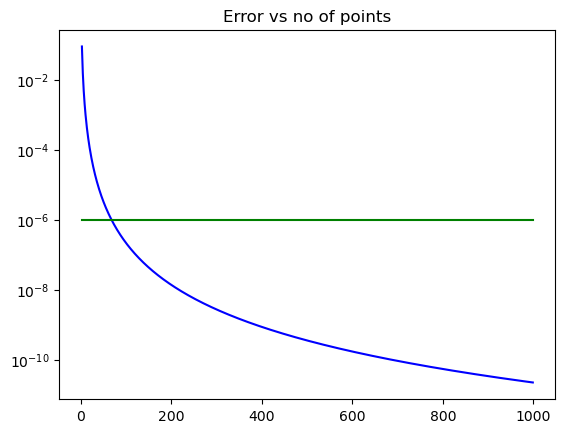

In [41]:
ra = range(2,1000)
error = []
error1 = []
for i in ra:
    x = np.linspace(0.1,0.9,i) 
    y = function(x)


    # Set boundary conditions: first and last derivatives 
    yp1 = funcder(x[0])  # Derivative at the start
    ypn = funcder(x[-1])  # Derivative at the end

    # Compute the second derivatives
    #y2 = spline(x, y, yp1, ypn)

    # Evaluate the spline at new points
    xx = np.linspace(0.1,0.9, 10*i)
    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    #err = np.abs(yy-tyy)
    #error.append(np.max(err))
    cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
    yy2 = cs(xx)
    err1 = np.abs(tyy-yy2)
    error1.append(np.max(err1))
    if i%100 == 0 :
        print(i,np.max(err1))
hor = [10**-6 for i in ra]
error1der = error1

plt.semilogy(ra,error1,"b",ra,hor,"g")
plt.title('Error vs no of points')



171.8552382672391 11.728789794456166 (100,)


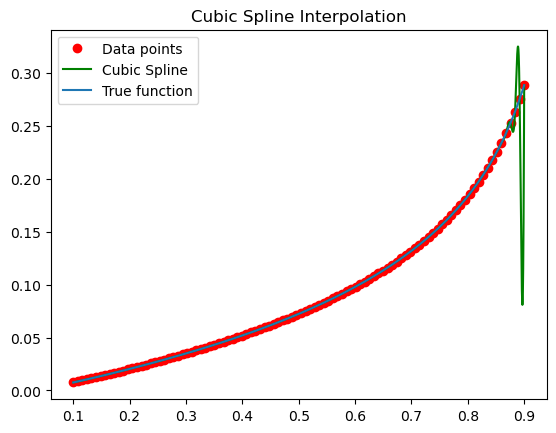

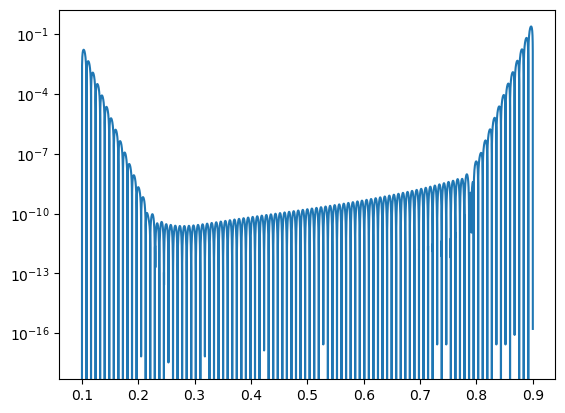

In [42]:
x = np.linspace(0.1,0.9,100) 
y = function(x)

# Set boundary conditions: first and last derivatives (natural spline)
yp1 = 100*funcder(x[0])  # Derivative at the start
ypn = 100*funcder(x[-1]) # Derivative at the end

print(ypn,yp1,x.shape)

# Compute the second derivatives
y2 = spline(x, y, yp1, ypn)

# Evaluate the spline at new points
xx = np.linspace(0.1,0.9, 10000)
yy = np.array([splint(x, y, y2, xi) for xi in xx])
tyy = function(xx)
err = np.abs(yy-tyy)
cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
yy2 = cs(xx)
err1 = np.abs(tyy-yy2)

# Plot the results
plt.figure()
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'g', label='Cubic Spline')
plt.plot(xx,tyy,label = "True function")
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()
plt.semilogy(xx,err1)

Text(0.5, 1.0, 'Error vs no of points')

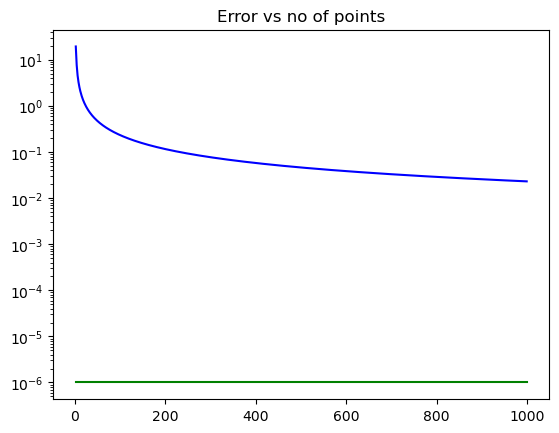

In [43]:
ra = range(2,1000)
error = []
error1 = []
for i in ra:
    x = np.linspace(0.1,0.9,i) 
    y = function(x)


    yp1 = 100*funcder(x[0])  # Derivative at the start
    ypn = 100*funcder(x[-1])  # Derivative at the end

    # Compute the second derivatives
    #y2 = spline(x, y, yp1, ypn)

    # Evaluate the spline at new points
    xx = np.linspace(0.1,0.9, 10*i)
    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    #err = np.abs(yy-tyy)
    #error.append(np.max(err))
    cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
    yy2 = cs(xx)
    err1 = np.abs(tyy-yy2)
    error1.append(np.max(err1))
hor = [10**-6 for i in ra]

plt.semilogy(ra,error1,"b",ra,hor,"g")
plt.title('Error vs no of points')


In [44]:
###ra = range(2,1000)
error = []
error1 = []
for i in ra:
    x = np.sort(np.array([(0.5+np.exp(-k)) for k in range(1,i)]+[0.5-np.exp(-k)  for k in range(1,i)]))
    print(x)
    y = function(x)


    # Set boundary conditions: first and last derivatives 
    yp1 = 100*funcder(x[0])  # Derivative at the start
    ypn = 100*funcder(x[-1])  # Derivative at the end

    # Compute the second derivatives
    
    #y2 = spline(x, y, yp1, ypn)

    # Evaluate the spline at new points
    xx = np.linspace(0.1,0.9, 10*i)
    #yy = np.array([splint(x, y, y2, xi) for xi in xx])
    tyy = function(xx)
    #err = np.abs(yy-tyy)
    #error.append(np.max(err))
    cs = CubicSpline(x, y, bc_type=((1, yp1), (1, ypn)))
    yy2 = cs(xx)
    err1 = np.abs(tyy-yy2)
    error1.append(np.max(err1))
hor = [10**-6 for i in ra]

plt.semilogy(ra,error1,"b",ra,hor,"g")
plt.title('Error vs no of points')

[0.13212056 0.86787944]
[0.13212056 0.36466472 0.63533528 0.86787944]
[0.13212056 0.36466472 0.45021293 0.54978707 0.63533528 0.86787944]
[0.13212056 0.36466472 0.45021293 0.48168436 0.51831564 0.54978707
 0.63533528 0.86787944]
[0.13212056 0.36466472 0.45021293 0.48168436 0.49326205 0.50673795
 0.51831564 0.54978707 0.63533528 0.86787944]
[0.13212056 0.36466472 0.45021293 0.48168436 0.49326205 0.49752125
 0.50247875 0.50673795 0.51831564 0.54978707 0.63533528 0.86787944]
[0.13212056 0.36466472 0.45021293 0.48168436 0.49326205 0.49752125
 0.49908812 0.50091188 0.50247875 0.50673795 0.51831564 0.54978707
 0.63533528 0.86787944]
[0.13212056 0.36466472 0.45021293 0.48168436 0.49326205 0.49752125
 0.49908812 0.49966454 0.50033546 0.50091188 0.50247875 0.50673795
 0.51831564 0.54978707 0.63533528 0.86787944]
[0.13212056 0.36466472 0.45021293 0.48168436 0.49326205 0.49752125
 0.49908812 0.49966454 0.49987659 0.50012341 0.50033546 0.50091188
 0.50247875 0.50673795 0.51831564 0.54978707 0.6353

ValueError: `x` must be strictly increasing sequence.